# ![](https://ga-dash.s3.amazonaws.com/production/assets/logo-9f88ae6c9c3871690e33280fcf557f33.png)  Capstone Project - Customer Churn Prediction

Benjamin Toh, DSIF2


**Problem Statement**

How to prevent company from losing customer to their competitors and to retain valuable customers

**Executive Summary**

The number of e-commerce companies has increased over the years. A problem that companies faced is that they are losing their customer to their competitors due to various reasons. This is also known as customer churning. Studies on customers' demographic and their browsing behaviors can help to analysis how companies can retain certain group of customers. Customer retention is impose lesser cost as compared to acquiring new customer due to the high marketing cost.  

This project will be ultilizing a e-commerce dataset which belongs to a Machine Learning Challenge hosted at Hacker Earth. It has 25 columns of different features relating to demographic, browsing behavior and transaction data. Exploration, cleaning, features engineering and modelling will be done using this data, to acheive the best model in predicting the churn risk score, ranging from 1 to 5 with 1 being the least and 5 being the most.

The objective is to create the best model by evaluation of F1 score and undergo deployment for companies to input their data and have an accurate prediction on the customer churn rsk score. 

## 1. Import libararies

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import GridSearchCV, train_test_split, StratifiedKFold
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import plot_confusion_matrix, accuracy_score, f1_score, plot_roc_curve, roc_auc_score, precision_score, recall_score

import datetime as datetime
from datetime import date, time
from dateutil.relativedelta import relativedelta

import plotly as py
import plotly.express as px
import plotly.graph_objects as go

## 2. Import Data

In [2]:
train = pd.read_csv('train.csv')

In [3]:
train.head()

,customer_id,Name,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,fffe4300490044003600300030003800,Pattie Morrisey,18,F,XW0DQ7H,Village,Platinum Membership,2017-08-17,No,xxxxxxxx,...,300.63,53005.25,17.0,781.75,Yes,Yes,No,Not Applicable,Products always in Stock,2
1,fffe43004900440032003100300035003700,Traci Peery,32,F,5K0N3X1,City,Premium Membership,2017-08-28,?,CID21329,...,306.34,12838.38,10.0,NaN,Yes,No,Yes,Solved,Quality Customer Care,1
2,fffe4300490044003100390032003600,Merideth Mcmeen,44,F,1F2TCL3,Town,No Membership,2016-11-11,Yes,CID12313,...,516.16,21027.00,22.0,500.69,No,Yes,Yes,Solved in Follow-up,Poor Website,5
3,fffe43004900440036003000330031003600,Eufemia Cardwell,37,M,VJGJ33N,City,No Membership,2016-10-29,Yes,CID3793,...,53.27,25239.56,6.0,567.66,No,Yes,Yes,Unsolved,Poor Website,5
4,fffe43004900440031003900350030003600,Meghan Kosak,31,F,SVZXCWB,City,No Membership,2017-09-12,No,xxxxxxxx,...,113.13,24483.66,16.0,663.06,No,Yes,Yes,Solved,Poor Website,5


In [4]:
train.shape

(36992, 25)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36992 entries, 0 to 36991
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   customer_id                   36992 non-null  object 
 1   Name                          36992 non-null  object 
 2   age                           36992 non-null  int64  
 3   gender                        36992 non-null  object 
 4   security_no                   36992 non-null  object 
 5   region_category               31564 non-null  object 
 6   membership_category           36992 non-null  object 
 7   joining_date                  36992 non-null  object 
 8   joined_through_referral       36992 non-null  object 
 9   referral_id                   36992 non-null  object 
 10  preferred_offer_types         36704 non-null  object 
 11  medium_of_operation           36992 non-null  object 
 12  internet_option               36992 non-null  object 
 13  l

## 3. Cleaning of Data

### Dealing with missing values

In [6]:
#Check for missing values
train.isnull().sum().sort_values(ascending = False)

region_category                 5428
points_in_wallet                3443
preferred_offer_types            288
customer_id                        0
days_since_last_login              0
feedback                           0
complaint_status                   0
past_complaint                     0
offer_application_preference       0
used_special_discount              0
avg_frequency_login_days           0
avg_transaction_value              0
avg_time_spent                     0
internet_option                    0
last_visit_time                    0
Name                               0
medium_of_operation                0
referral_id                        0
joined_through_referral            0
joining_date                       0
membership_category                0
security_no                        0
gender                             0
age                                0
churn_risk_score                   0
dtype: int64

In [7]:
train[['region_category']].value_counts()

region_category
Town               14128
City               12737
Village             4699
dtype: int64

In [8]:
#Check for 'region_category' mode
train['region_category'].mode()

0    Town
dtype: object

In [9]:
train['region_category'] = train['region_category'].fillna('Town')

In [10]:
train[['region_category']].value_counts()

region_category
Town               19556
City               12737
Village             4699
dtype: int64

In [11]:
#Replace points_in_wallet null values to 0
train['points_in_wallet'] = train['points_in_wallet'].fillna(0)

In [12]:
train[['preferred_offer_types']].value_counts()

preferred_offer_types   
Gift Vouchers/Coupons       12349
Credit/Debit Card Offers    12274
Without Offers              12081
dtype: int64

In [13]:
#Check for 'preferred_offer_types'
train['preferred_offer_types'].mode()

0    Gift Vouchers/Coupons
dtype: object

In [14]:
train['preferred_offer_types'] = train['preferred_offer_types'].fillna('Gift Vouchers/Coupons')

In [15]:
#Check for missing values again
train.isnull().sum()

customer_id                     0
Name                            0
age                             0
gender                          0
security_no                     0
region_category                 0
membership_category             0
joining_date                    0
joined_through_referral         0
referral_id                     0
preferred_offer_types           0
medium_of_operation             0
internet_option                 0
last_visit_time                 0
days_since_last_login           0
avg_time_spent                  0
avg_transaction_value           0
avg_frequency_login_days        0
points_in_wallet                0
used_special_discount           0
offer_application_preference    0
past_complaint                  0
complaint_status                0
feedback                        0
churn_risk_score                0
dtype: int64

### Check Target Variable 

In [16]:
train['churn_risk_score'].value_counts()

 3    10424
 4    10185
 5     9827
 2     2741
 1     2652
-1     1163
Name: churn_risk_score, dtype: int64

In [17]:
#Remove rows where 'churn_risk_score' = -1
train.drop(train.loc[train['churn_risk_score'] == -1].index, inplace = True)

In [18]:
train['churn_risk_score'].value_counts()

3    10424
4    10185
5     9827
2     2741
1     2652
Name: churn_risk_score, dtype: int64

In [19]:
train.shape

(35829, 25)

### Create a function to convert yes/no to Yes = 1, No = 0

In [20]:
# Find out which features is under a 'Yes' or 'No' results
train.columns[train.isin(['Yes' or 'No']).any()]

Index(['joined_through_referral', 'used_special_discount',
       'offer_application_preference', 'past_complaint'],
      dtype='object')

In [21]:
def convert_yesno(df):
    columns = train.columns[train.isin(['Yes' or 'No']).any()]
    for i in columns:
        df[i] = df[i].replace({'Yes' : 1, 'No' :0})
    return df

In [22]:
convert_yesno(train)

,customer_id,Name,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,fffe4300490044003600300030003800,Pattie Morrisey,18,F,XW0DQ7H,Village,Platinum Membership,2017-08-17,0,xxxxxxxx,...,300.630000,53005.25,17.0,781.750000,1,1,0,Not Applicable,Products always in Stock,2
1,fffe43004900440032003100300035003700,Traci Peery,32,F,5K0N3X1,City,Premium Membership,2017-08-28,?,CID21329,...,306.340000,12838.38,10.0,0.000000,1,0,1,Solved,Quality Customer Care,1
2,fffe4300490044003100390032003600,Merideth Mcmeen,44,F,1F2TCL3,Town,No Membership,2016-11-11,1,CID12313,...,516.160000,21027.00,22.0,500.690000,0,1,1,Solved in Follow-up,Poor Website,5
3,fffe43004900440036003000330031003600,Eufemia Cardwell,37,M,VJGJ33N,City,No Membership,2016-10-29,1,CID3793,...,53.270000,25239.56,6.0,567.660000,0,1,1,Unsolved,Poor Website,5
4,fffe43004900440031003900350030003600,Meghan Kosak,31,F,SVZXCWB,City,No Membership,2017-09-12,0,xxxxxxxx,...,113.130000,24483.66,16.0,663.060000,0,1,1,Solved,Poor Website,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36987,fffe43004900440035003500390036003100,Cuc Tarr,46,F,6F51HFO,Town,Basic Membership,2017-09-21,0,xxxxxxxx,...,-650.682759,27277.68,6.0,639.510000,0,1,1,No Information Available,No reason specified,4
36988,fffe43004900440033003500380036003600,Jenni Stronach,29,F,21KSM8Y,Town,Basic Membership,2016-06-27,0,xxxxxxxx,...,-638.123421,11069.71,28.0,527.990000,1,0,0,Not Applicable,Poor Customer Service,5
36989,fffe4300490044003500330034003100,Luciana Kinch,23,F,XK1IM9H,Town,Basic Membership,2016-09-11,1,CID3838,...,154.940000,38127.56,Error,680.470000,0,1,1,Unsolved,Poor Website,4
36990,fffe43004900440031003200390039003000,Tawana Ardoin,53,M,K6VTP1Z,Village,Platinum Membership,2017-06-15,0,xxxxxxxx,...,482.610000,2378.86,20.0,197.264414,1,1,0,Not Applicable,No reason specified,3


### Create a function to clean data that have special characters to 'Unknown'

In [23]:
def convert_special_char(df):
    spec_chars = ["!",'"',"#","%","&","'","(",")", 
              "*","+",",","-",".","/",":",";","<",
              "=",">","?","@","[","\\","]","^","_", 
              "`","{","|","}","~","–"]
    columns = train.columns[train.isin([spec_chars]).any()]
    for i in columns:
        df[i] = df[i].replace({spec_chars : 'Unknown'})
        print(i)

In [24]:
convert_special_char(train)

In [25]:
unknown_columns = train.columns[train.isin(['Unknown']).any()]
print(unknown_columns)

Index(['gender'], dtype='object')


In [26]:
train['gender'].value_counts()

F          17892
M          17881
Unknown       56
Name: gender, dtype: int64

In [27]:
#Since 'Unknown' is only small portion, will just replace with 'gender' mode
train['gender'].mode()

0    F
dtype: object

In [28]:
train['gender'] = train['gender'].replace({'Unknown': 'F'})
print(train[['gender']].value_counts())

gender
F         17948
M         17881
dtype: int64


### Drop columns that are IDs, Name and Time related

In [29]:
list(train.select_dtypes(['object']).columns)

['customer_id',
 'Name',
 'gender',
 'security_no',
 'region_category',
 'membership_category',
 'joining_date',
 'joined_through_referral',
 'referral_id',
 'preferred_offer_types',
 'medium_of_operation',
 'internet_option',
 'last_visit_time',
 'avg_frequency_login_days',
 'complaint_status',
 'feedback']

In [30]:
question_mark_columns = train.columns[train.isin(['?']).any()]
print(question_mark_columns)

Index(['joined_through_referral', 'medium_of_operation'], dtype='object')


In [31]:
print(train[['joined_through_referral']].value_counts(),'\n')
print(train[['medium_of_operation']].value_counts())

joined_through_referral
0                          15354
1                          15183
?                           5292
dtype: int64 

medium_of_operation
Desktop                13476
Smartphone             13444
?                       5230
Both                    3679
dtype: int64


In [32]:
print(train[['joined_through_referral']].mode())
print(train[['medium_of_operation']].mode(),'\n')

  joined_through_referral
0                       0
  medium_of_operation
0             Desktop 



In [33]:
train['joined_through_referral'] = train['joined_through_referral'].replace({'?': 0})
print(train[['joined_through_referral']].value_counts(),'\n')
train['medium_of_operation'] = train['medium_of_operation'].replace({'?': 'Desktop'})
print(train[['medium_of_operation']].value_counts())

joined_through_referral
0                          20646
1                          15183
dtype: int64 

medium_of_operation
Desktop                18706
Smartphone             13444
Both                    3679
dtype: int64


In [34]:
question_mark_columns = train.columns[train.isin(['Unknown']).any()]
print(question_mark_columns)

Index([], dtype='object')


In [35]:
train['days_since_last_login'].value_counts()

 12     2307
 13     2288
 14     2226
 15     2208
 11     2195
 10     2025
 16     2002
-999    1944
 9      1801
 17     1689
 8      1529
 7      1406
 18     1385
 19     1275
 6      1222
 5      1190
 20     1140
 21      992
 4       967
 22      856
 3       830
 23      704
 2       590
 24      460
 1       323
 25      197
 26       78
Name: days_since_last_login, dtype: int64

In [36]:
train['medium_of_operation'].mode()

0    Desktop
dtype: object

In [37]:
train['medium_of_operation'].value_counts()

Desktop       18706
Smartphone    13444
Both           3679
Name: medium_of_operation, dtype: int64

### Replace Error values in avg_frequency_login_days with mean

In [38]:
train['avg_frequency_login_days'].value_counts()

Error                 3419
13.0                  1361
8.0                   1326
19.0                  1319
14.0                  1315
                      ... 
-8.467490594280484       1
5.66036451671096         1
43.547489162776344       1
48.60961229813299        1
36.33902856946625        1
Name: avg_frequency_login_days, Length: 1587, dtype: int64

In [39]:
train['avg_frequency_login_days'] = train['avg_frequency_login_days'].replace({'Error': 0})

In [40]:
train['avg_frequency_login_days'] = round(train['avg_frequency_login_days'].astype('float'), 0)

In [41]:
#Replace negative values with 0
train['avg_frequency_login_days'] = np.where(train['avg_frequency_login_days'] < 0, 0 , train['avg_frequency_login_days'])

In [42]:
(train['avg_frequency_login_days'].values < 0).any()

False

In [43]:
avg_freq_mean = round(train['avg_frequency_login_days'].mean())
print(avg_freq_mean)

15


In [44]:
train['avg_frequency_login_days'] = train['avg_frequency_login_days'].replace({0: avg_freq_mean})

In [45]:
train['avg_frequency_login_days'].value_counts()

15.0    5380
13.0    1362
8.0     1326
19.0    1320
14.0    1315
6.0     1313
17.0    1303
10.0    1298
18.0    1294
12.0    1292
5.0     1283
16.0    1281
9.0     1270
7.0     1259
11.0    1211
29.0    1088
27.0    1082
28.0    1077
23.0    1066
25.0    1064
26.0    1039
21.0    1036
20.0    1034
24.0    1018
22.0    1013
4.0      280
3.0      270
1.0      268
2.0      258
36.0      46
40.0      43
46.0      38
39.0      37
33.0      36
43.0      35
44.0      35
38.0      34
32.0      32
48.0      31
42.0      30
37.0      29
34.0      28
31.0      27
52.0      26
35.0      25
47.0      24
45.0      24
50.0      22
41.0      22
51.0      21
30.0      20
49.0      19
53.0      17
55.0      11
54.0      10
56.0       3
64.0       1
57.0       1
73.0       1
67.0       1
Name: avg_frequency_login_days, dtype: int64

### Remove negative values for ' avg_time_spent'

In [46]:
train['avg_time_spent'].value_counts()

 34.100000      21
 34.710000      20
 33.680000      19
 34.330000      19
 32.910000      18
                ..
 249.560000      1
 384.860000      1
-814.633250      1
-1130.866721     1
 677.660000      1
Name: avg_time_spent, Length: 25299, dtype: int64

In [47]:
train.drop(train.loc[train['avg_time_spent'] < 0].index, inplace = True)

In [48]:
(train['avg_time_spent'] < 0).any()

False

### Drop index where 'days_since_last_login' is negative 

In [49]:
train['days_since_last_login'].value_counts()

 12     2206
 13     2162
 14     2135
 15     2094
 11     2085
 10     1946
 16     1908
-999    1862
 9      1712
 17     1612
 8      1453
 7      1344
 18     1336
 19     1221
 6      1166
 5      1127
 20     1099
 21      954
 4       924
 22      818
 3       783
 23      670
 2       558
 24      432
 1       311
 25      181
 26       71
Name: days_since_last_login, dtype: int64

In [50]:
#Mean of 'days_since_last_login' is negative and having a negative value for days does not make sense
train.drop(train.loc[train['days_since_last_login'] < 0].index, inplace = True)

In [51]:
train.shape

(32308, 25)

## 4. Feature Engineering

### Convert 'feedback' to positive  or negative

In [52]:
train['feedback'].value_counts()

Poor Product Quality        5551
Too many ads                5491
Poor Website                5472
No reason specified         5451
Poor Customer Service       5446
Reasonable Price            1243
User Friendly Website       1240
Products always in Stock    1224
Quality Customer Care       1190
Name: feedback, dtype: int64

In [53]:
train['feedback'] = train['feedback'].replace({'Poor Product Quality': 'negative', 
                                                'Too many ads' : 'negative', 
                                                'Poor Customer Service': 'negative',
                                                'Poor Website': 'negative',
                                                'No reason specified': 'positive',
                                                'Reasonable Price': 'positive',
                                                'User Friendly Website': 'positive',
                                                'Products always in Stock': 'positive',
                                                'Quality Customer Care': 'positive'})

In [54]:
train['feedback'].value_counts()

negative    21960
positive    10348
Name: feedback, dtype: int64

### Convert 'age' to 'Age group', eg. Teenager, Adult, Senior

In [55]:
for x in train['age']:
    if x < 30:
        train['age'] = train['age'].replace({x: 'Teenager (Less than 30)'})
    elif x > 30 & x <= 60:
        train['age'] = train['age'].replace({x: 'Adult (30 to 60)'})
    else:
        train['age'] = train['age'].replace({x: 'Senior (More than 60)'})

In [56]:
train = train.rename(columns = {'age': 'Age group'})

In [57]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32308 entries, 0 to 36991
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   customer_id                   32308 non-null  object 
 1   Name                          32308 non-null  object 
 2   Age group                     32308 non-null  object 
 3   gender                        32308 non-null  object 
 4   security_no                   32308 non-null  object 
 5   region_category               32308 non-null  object 
 6   membership_category           32308 non-null  object 
 7   joining_date                  32308 non-null  object 
 8   joined_through_referral       32308 non-null  int64  
 9   referral_id                   32308 non-null  object 
 10  preferred_offer_types         32308 non-null  object 
 11  medium_of_operation           32308 non-null  object 
 12  internet_option               32308 non-null  object 
 13  l

In [58]:
train['Age group'].value_counts()

Adult (30 to 60)           20065
Teenager (Less than 30)    11618
Senior (More than 60)        625
Name: Age group, dtype: int64

### Convert 'last_visit_time' to 'Time of the day', eg. Day, Afternoon, Evening

In [59]:
train['last_visit_time'] = pd.to_datetime(train['last_visit_time'])

In [60]:
for a in train['last_visit_time']:
    hr = a.hour
    if hr <= 12:
        train['last_visit_time'] = train['last_visit_time'].replace({a: 'Morning'})
    elif hr > 12 & hr < 7:
        train['last_visit_time'] = train['last_visit_time'].replace({a: 'Afternoon'})
    else:
        train['last_visit_time'] = train['last_visit_time'].replace({a: 'Evening'})

In [61]:
train['last_visit_time'].value_counts()

Morning      17433
Afternoon    10809
Evening       4066
Name: last_visit_time, dtype: int64

## 5. Data exploration and visualizations

In [62]:
train['joining_date'] = pd.to_datetime(train['joining_date'], format ='%Y-%m-%d')

In [63]:
train_date = train[['joining_date', 'avg_transaction_value']].sort_values(by = 'joining_date')

In [64]:
train_date.head()

,joining_date,avg_transaction_value
24081,2015-01-01,32055.67
2024,2015-01-01,6577.58
19298,2015-01-01,39515.73
35697,2015-01-01,38453.90
16477,2015-01-01,46776.66


In [65]:
train_date = train_date.set_index('joining_date')

In [66]:
train_date = train_date.resample('M').sum()

In [67]:
train_date = train_date.reset_index('joining_date')

In [68]:
train_date.head()

,joining_date,avg_transaction_value
0,2015-01-31,26810645.86
1,2015-02-28,24192976.50
2,2015-03-31,26223174.30
3,2015-04-30,24374836.86
4,2015-05-31,26502481.24


In [69]:
train_date.shape

(36, 2)

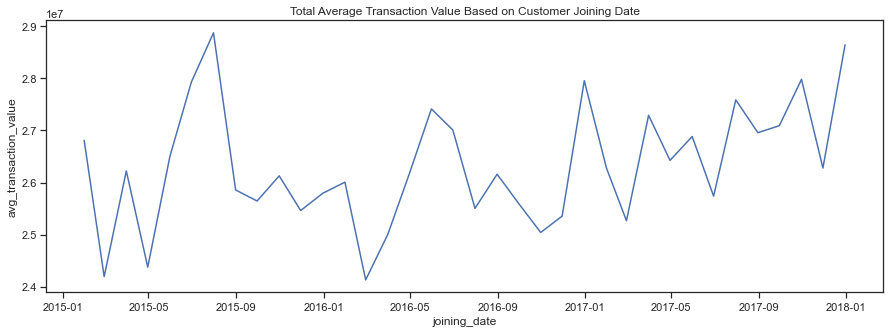

In [70]:
plt.figure(figsize = (15,5))
sns.set_theme(style = 'ticks')
sns.lineplot(x = 'joining_date', y = 'avg_transaction_value', data = train_date).set_title('Total Average Transaction Value Based on Customer Joining Date')
plt.show()

### Plot how many customers joined on different days

In [71]:
df = train.groupby(by = ["joining_date"]).size().reset_index(name="counts")

In [72]:
df.head()

,joining_date,counts
0,2015-01-01,20
1,2015-01-02,26
2,2015-01-03,30
3,2015-01-04,30
4,2015-01-05,40


In [73]:
df = df.set_index('joining_date')

In [74]:
df = df.resample('M').sum()

In [75]:
df = df.reset_index('joining_date')

In [76]:
df.head()

,joining_date,counts
0,2015-01-31,924
1,2015-02-28,805
2,2015-03-31,887
3,2015-04-30,850
4,2015-05-31,869


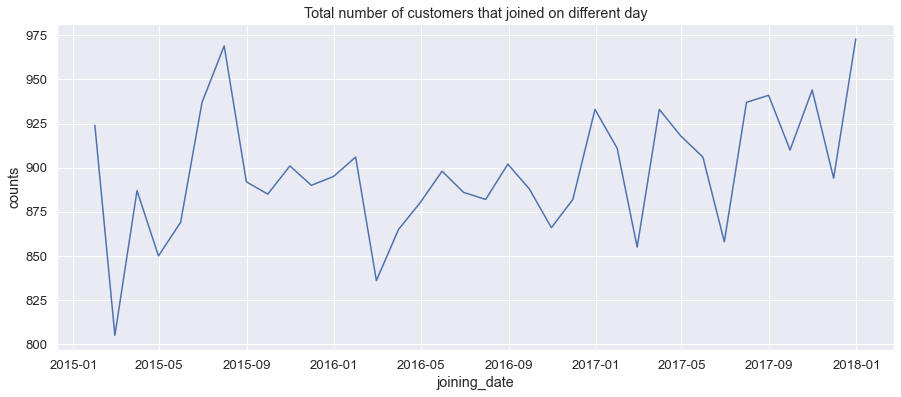

In [77]:
fig = plt.figure(figsize=(15,6))
sns.set(font_scale = 1.2)
sns.lineplot(x = "joining_date", y = 'counts', data = df).set_title('Total number of customers that joined on different day')
plt.show()

In [78]:
df_year = df.set_index('joining_date')
df_year = df_year.resample('Y').sum()
df_year = df_year.reset_index('joining_date')

In [79]:
df_year.head()

,joining_date,counts
0,2015-12-31,10704
1,2016-12-31,10624
2,2017-12-31,10980


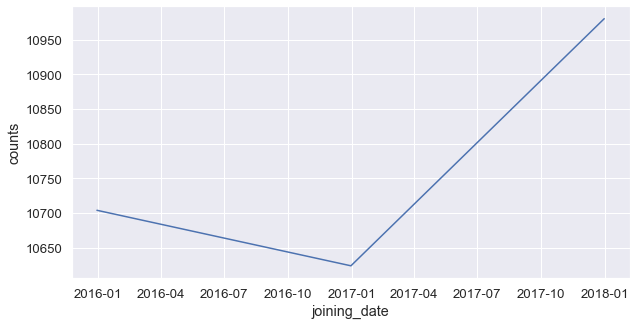

In [80]:
plt.figure(figsize = (10,5))
sns.lineplot(x = 'joining_date', y = 'counts', data = df_year)
plt.show()

### (Feature engineering) Convert 'joining_date' to 'Number of months as member', by comparing to latest joining date

In [81]:
train['joining_date'].sort_values(ascending = False)

34325   2017-12-31
21894   2017-12-31
12243   2017-12-31
4278    2017-12-31
4523    2017-12-31
           ...    
17506   2015-01-01
17823   2015-01-01
16477   2015-01-01
18571   2015-01-01
5755    2015-01-01
Name: joining_date, Length: 32308, dtype: datetime64[ns]

In [82]:
train['joining_date'] = pd.to_datetime(train['joining_date'], format ='%Y-%m-%d')

In [83]:
for i in train['joining_date']:
    date1 = pd.to_datetime('2017-12-31', format ='%Y-%m-%d')
    diff_months = relativedelta(date1, i).months
    train['joining_date'] = train['joining_date'].replace({i: diff_months})

In [84]:
train = train.rename(columns = {'joining_date': 'number of months as member'})

In [85]:
train.head()

,customer_id,Name,Age group,gender,security_no,region_category,membership_category,number of months as member,joined_through_referral,referral_id,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,fffe4300490044003600300030003800,Pattie Morrisey,Teenager (Less than 30),F,XW0DQ7H,Village,Platinum Membership,4,0,xxxxxxxx,...,300.63,53005.25,17.0,781.75,1,1,0,Not Applicable,positive,2
1,fffe43004900440032003100300035003700,Traci Peery,Adult (30 to 60),F,5K0N3X1,City,Premium Membership,4,0,CID21329,...,306.34,12838.38,10.0,0.00,1,0,1,Solved,positive,1
2,fffe4300490044003100390032003600,Merideth Mcmeen,Adult (30 to 60),F,1F2TCL3,Town,No Membership,1,1,CID12313,...,516.16,21027.00,22.0,500.69,0,1,1,Solved in Follow-up,negative,5
3,fffe43004900440036003000330031003600,Eufemia Cardwell,Adult (30 to 60),M,VJGJ33N,City,No Membership,2,1,CID3793,...,53.27,25239.56,6.0,567.66,0,1,1,Unsolved,negative,5
4,fffe43004900440031003900350030003600,Meghan Kosak,Adult (30 to 60),F,SVZXCWB,City,No Membership,3,0,xxxxxxxx,...,113.13,24483.66,16.0,663.06,0,1,1,Solved,negative,5


### Plot the average time spent by each membership catagories 

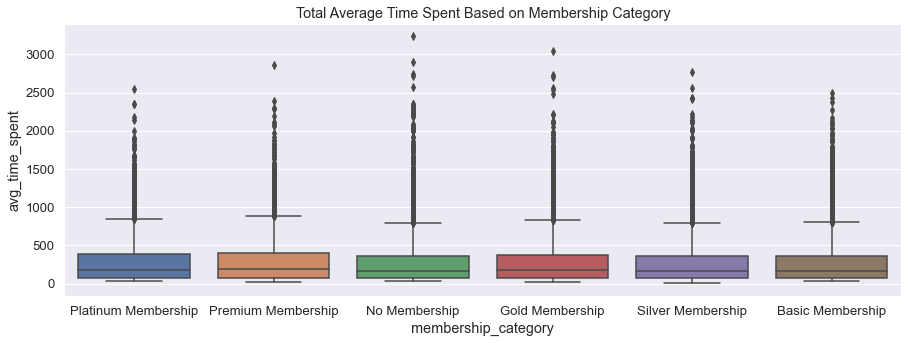

In [86]:
plt.figure(figsize = (15,5))
sns.boxplot(x = 'membership_category', y = 'avg_time_spent' , data = train).set_title('Total Average Time Spent Based on Membership Category')
#sns.set_theme(style = 'ticks')
plt.show()

### User Demographic and Browsing Behavior Charts

<Figure size 1080x720 with 0 Axes>

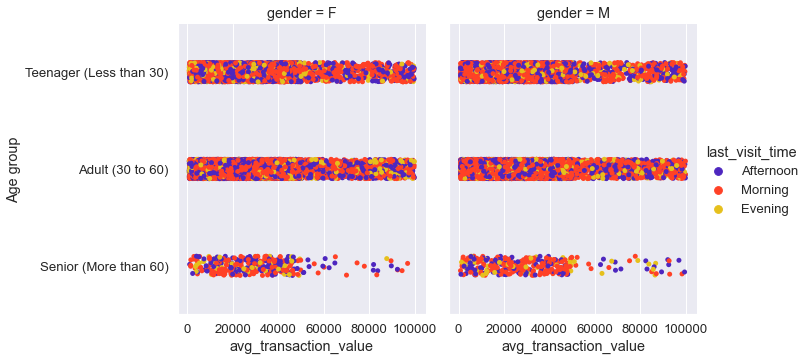

In [87]:
plt.figure(figsize = (15,10))
sns.catplot(x = 'avg_transaction_value', y = 'Age group', hue = "last_visit_time", col = 'gender', 
                 palette = 'CMRmap', data = train)
plt.show()

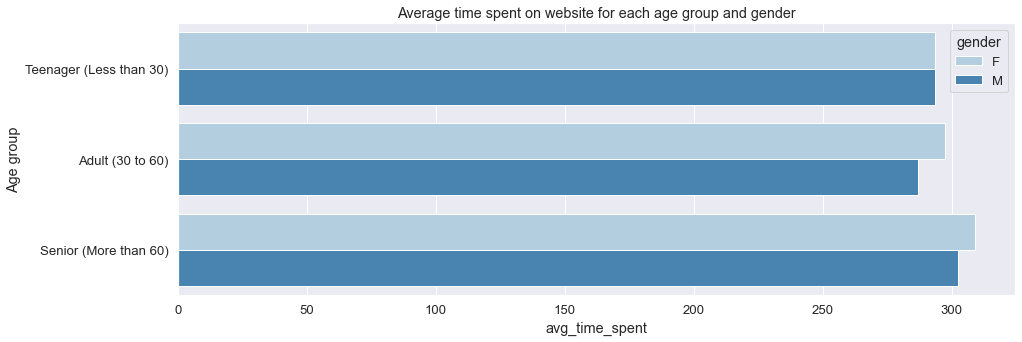

In [88]:
plt.figure(figsize = (15,5))
sns.barplot(x = 'avg_time_spent', y = 'Age group', hue = 'gender', ci = None,
                 palette = 'Blues', data = train)
plt.title('Average time spent on website for each age group and gender')
plt.show()

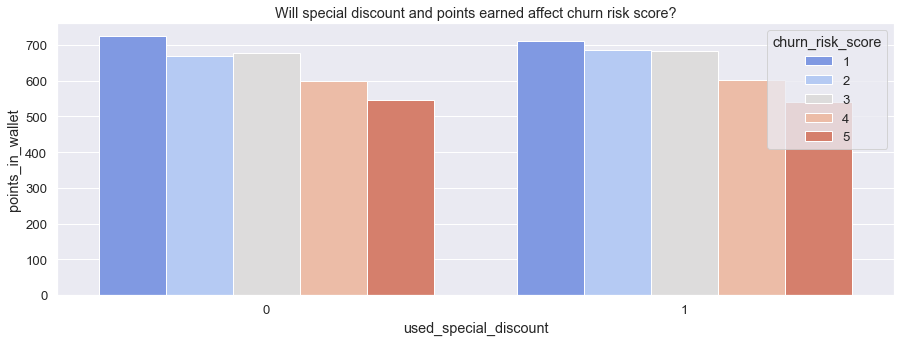

In [89]:
plt.figure(figsize = (15,5))
sns.barplot(x = 'used_special_discount', y = 'points_in_wallet', hue = 'churn_risk_score', ci = None,
                 palette = 'coolwarm', data = train)
plt.title('Will special discount and points earned affect churn risk score?')
plt.show()

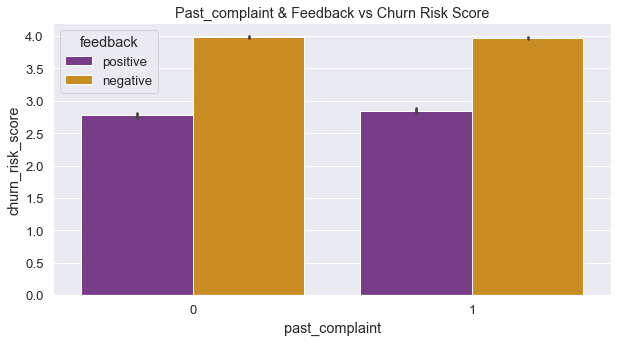

In [90]:
plt.figure(figsize = (10,5))
sns.barplot(x = 'past_complaint', y = 'churn_risk_score', hue = 'feedback',
                 palette = 'CMRmap', data = train).set_title('Past_complaint & Feedback vs Churn Risk Score')
plt.show()

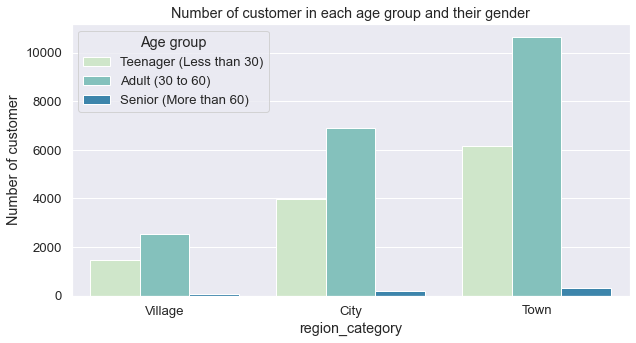

In [91]:
plt.figure(figsize = (10,5))
sns.countplot(x = 'region_category', data = train, hue = 'Age group', palette = 'GnBu')
plt.ylabel('Number of customer') 
plt.title('Number of customer in each age group and their gender')
plt.show()

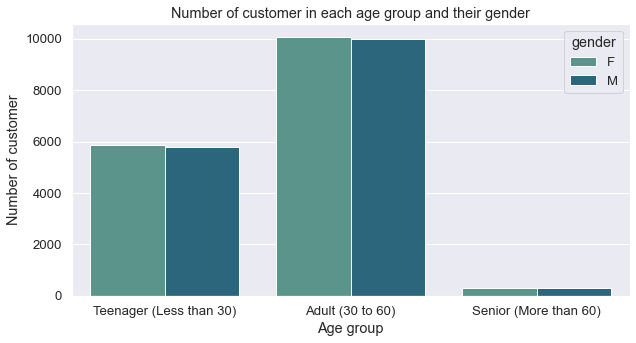

In [92]:
plt.figure(figsize = (10,5))
sns.countplot(x = 'Age group', data = train, hue = 'gender', palette = 'crest')
plt.ylabel('Number of customer') 
plt.title('Number of customer in each age group and their gender')
plt.show()

### Plot how much on average does each membership categories spent

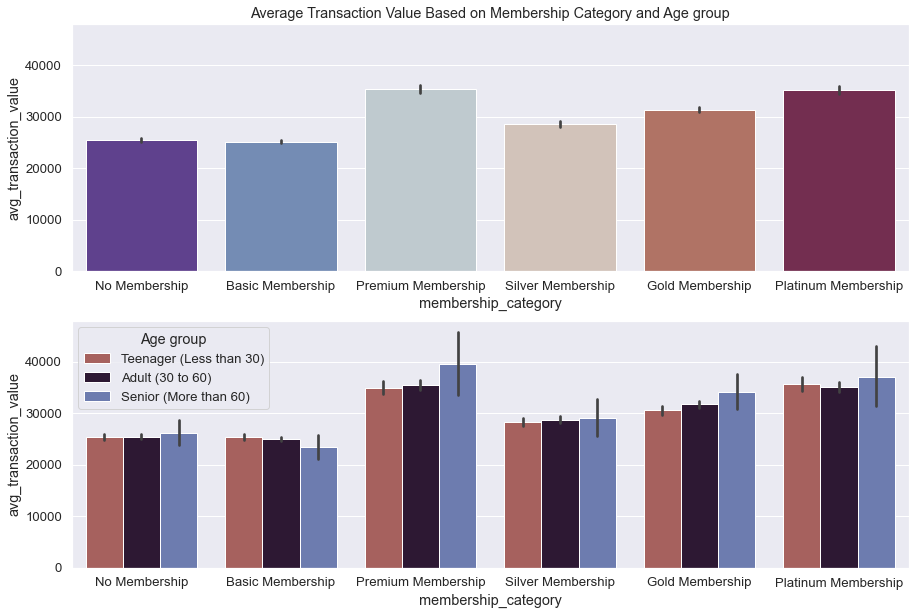

In [93]:
fig, axes = plt.subplots(2, 1, figsize=(15, 10), sharey = True)
sns.set(font_scale = 1.2)
sns.barplot(ax = axes[0], x = 'membership_category', y = 'avg_transaction_value', order = ['No Membership',
                                                                             'Basic Membership',
                                                                             'Premium Membership',
                                                                             'Silver Membership',
                                                                             'Gold Membership',
                                                                             'Platinum Membership'], palette = 'twilight_shifted',
                                                                              data = train).set_title('Average Transaction Value Based on Membership Category and Age group')

sns.barplot(ax = axes[1], x = 'membership_category', y = 'avg_transaction_value', order = ['No Membership',
                                                                             'Basic Membership',
                                                                             'Premium Membership',
                                                                             'Silver Membership',
                                                                             'Gold Membership', 
                                                                             'Platinum Membership'], hue = 'Age group', palette = 'twilight_r',
                                                                              data = train)


#sns.set_theme(style = 'ticks')
plt.show();

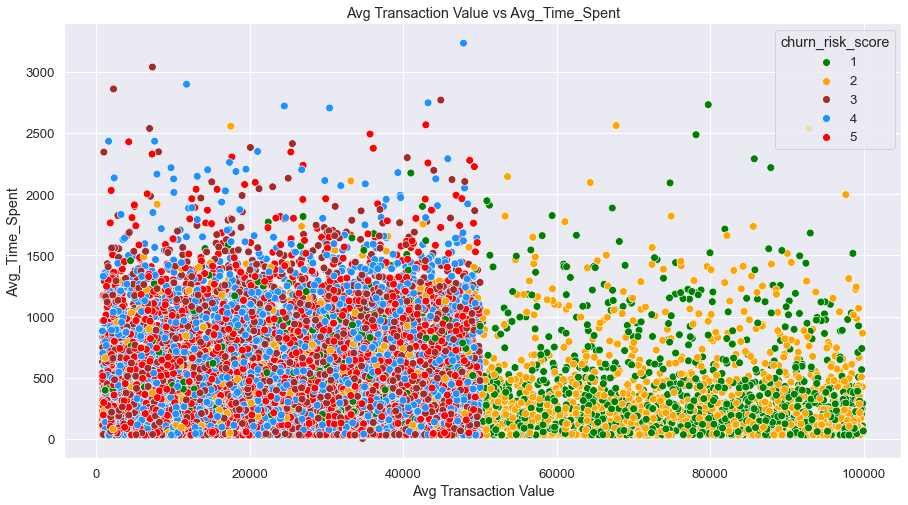

In [94]:
#Scatterplot for clusters
plt.figure(figsize = (15,8))
sns.scatterplot(x = 'avg_transaction_value', y = 'avg_time_spent',hue = "churn_risk_score",  
                 palette=['green','orange','brown','dodgerblue','red'], legend = 'full',data = train  ,s = 60 )
plt.xlabel('Avg Transaction Value')
plt.ylabel('Avg_Time_Spent') 
plt.title('Avg Transaction Value vs Avg_Time_Spent')
plt.show()

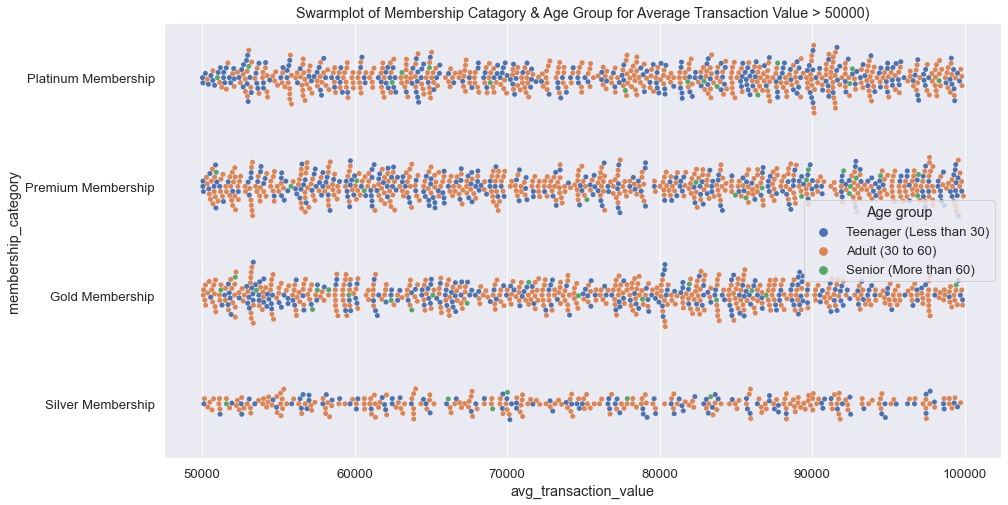

In [95]:
plt.figure(figsize = (15,8))
sns.swarmplot(x = 'avg_transaction_value', y = 'membership_category', hue = "Age group",  
                 palette = 'deep', data = train.loc[train['avg_transaction_value'] > 50000]).set_title('Swarmplot of Membership Catagory & Age Group for Average Transaction Value > 50000)');

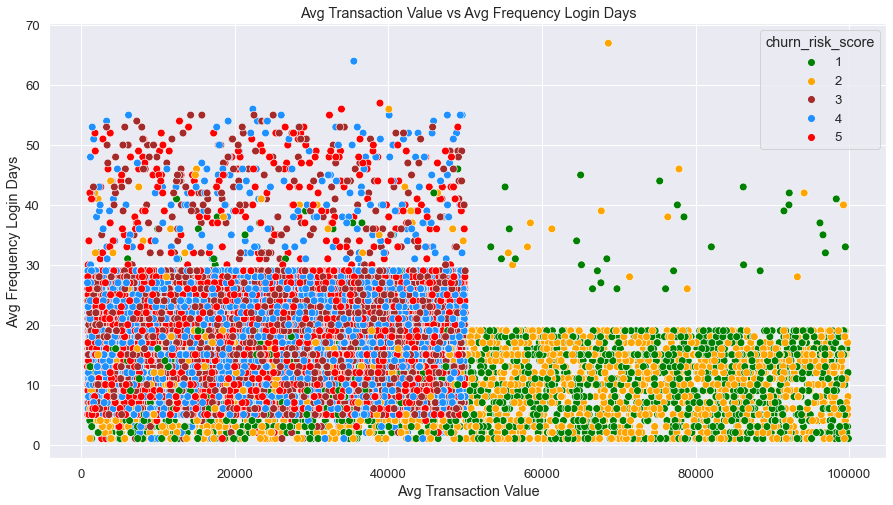

In [96]:
plt.figure(figsize = (15,8))
sns.scatterplot(x = 'avg_transaction_value', y = 'avg_frequency_login_days', hue = "churn_risk_score",  
                 palette=['green','orange','brown','dodgerblue','red'], legend = 'full', data = train ,s = 60 )
plt.xlabel('Avg Transaction Value')
plt.ylabel('Avg Frequency Login Days') 
plt.title('Avg Transaction Value vs Avg Frequency Login Days')
plt.show()

## 6. Modeling

### Drop columns that are IDs, Name and Time related

In [97]:
list(train.select_dtypes(['object']).columns)

['customer_id',
 'Name',
 'Age group',
 'gender',
 'security_no',
 'region_category',
 'membership_category',
 'referral_id',
 'preferred_offer_types',
 'medium_of_operation',
 'internet_option',
 'last_visit_time',
 'complaint_status',
 'feedback']

In [98]:
train_dummies = train.drop(columns = ['customer_id', 'Name', 'security_no', 'referral_id', 'last_visit_time'])

In [99]:
list(train_dummies.select_dtypes(['object']).columns)

['Age group',
 'gender',
 'region_category',
 'membership_category',
 'preferred_offer_types',
 'medium_of_operation',
 'internet_option',
 'complaint_status',
 'feedback']

In [100]:
train_dummies = pd.get_dummies(train_dummies, columns = ['gender',
                                                 'Age group',
                                                 'region_category',
                                                 'membership_category',
                                                 'preferred_offer_types',
                                                 'medium_of_operation',
                                                 'internet_option',
                                                 'complaint_status',
                                                 'feedback'
                                                ])

In [101]:
train_dummies.shape

(32308, 41)

In [102]:
train_dummies.head()

,number of months as member,joined_through_referral,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,...,internet_option_Fiber_Optic,internet_option_Mobile_Data,internet_option_Wi-Fi,complaint_status_No Information Available,complaint_status_Not Applicable,complaint_status_Solved,complaint_status_Solved in Follow-up,complaint_status_Unsolved,feedback_negative,feedback_positive
0,4,0,17,300.63,53005.25,17.0,781.75,1,1,0,...,0,0,1,0,1,0,0,0,0,1
1,4,0,16,306.34,12838.38,10.0,0.00,1,0,1,...,0,1,0,0,0,1,0,0,0,1
2,1,1,14,516.16,21027.00,22.0,500.69,0,1,1,...,0,0,1,0,0,0,1,0,1,0
3,2,1,11,53.27,25239.56,6.0,567.66,0,1,1,...,0,1,0,0,0,0,0,1,1,0
4,3,0,20,113.13,24483.66,16.0,663.06,0,1,1,...,0,1,0,0,0,1,0,0,1,0


In [103]:
train_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32308 entries, 0 to 36991
Data columns (total 41 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   number of months as member                      32308 non-null  int64  
 1   joined_through_referral                         32308 non-null  int64  
 2   days_since_last_login                           32308 non-null  int64  
 3   avg_time_spent                                  32308 non-null  float64
 4   avg_transaction_value                           32308 non-null  float64
 5   avg_frequency_login_days                        32308 non-null  float64
 6   points_in_wallet                                32308 non-null  float64
 7   used_special_discount                           32308 non-null  int64  
 8   offer_application_preference                    32308 non-null  int64  
 9   past_complaint                         

In [104]:
X = train_dummies.drop(columns = 'churn_risk_score')
y = train_dummies['churn_risk_score']

In [105]:
#Baseline Accuracy
y.value_counts(normalize=True)

3    0.291476
4    0.282902
5    0.274050
2    0.076668
1    0.074904
Name: churn_risk_score, dtype: float64

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y, random_state = 42)

In [108]:
mms = MinMaxScaler()

In [109]:
X_train_sc = mms.fit_transform(X_train)
X_test_sc = mms.transform(X_test)

### Random Forest Classifier

In [110]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV

In [111]:
#Instatiate RandomForestClassifier
rfc = RandomForestClassifier(oob_score = True, n_jobs = -1, class_weight = 'balanced')

In [112]:
rfc_params = {
    'n_estimators': [50, 100, 150, 200, 250],
    'max_depth': [3, 4, 5, 6, 7],
    'min_samples_split': [3, 4, 5, 6, 7],
}
gs = GridSearchCV(rfc, param_grid = rfc_params, cv = 5, n_jobs = -1)
gs.fit(X_train_sc, y_train)
print(gs.best_score_)
gs.best_params_

0.7344240548308645


{'max_depth': 7, 'min_samples_split': 6, 'n_estimators': 200}

In [113]:
print(gs.score(X_train_sc, y_train))
print(gs.score(X_test_sc, y_test))

0.7420296263541897
0.7235118126483029


In [114]:
predictions_rfc = gs.predict(X_test_sc)
print(predictions_rfc)

[4 5 5 ... 2 4 5]


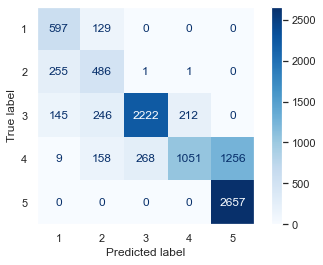

In [159]:
plot_confusion_matrix(gs, X_test_sc, y_test, cmap = 'Blues')
plt.grid(None);

In [116]:
print(f'F1 Score:', f1_score(y_test, predictions_rfc, average = 'weighted').round(3))
print(f'Accuracy Score:', accuracy_score(y_test, predictions_rfc).round(3))
print(f'Precision Score:', precision_score(y_test, predictions_rfc, average = 'weighted').round(3))
print(f'Recall Score:', recall_score(y_test, predictions_rfc, average = 'weighted').round(3))

F1 Score: 0.708
Accuracy Score: 0.724
Precision Score: 0.762
Recall Score: 0.724


### SVM

In [117]:
from sklearn.svm import LinearSVC

In [118]:
# C values to GridSearch over
pgrid = {"C": np.linspace(0.0001, 1, 1)}

In [119]:
# C values to GridSearch over
param_grid = {'C': [0.001, 0.005, 0.01, 0.1, 1]}

In [120]:
# Instantiate and fit a gridsearch model for this SVC
svc = LinearSVC(max_iter = 30000, multi_class = 'ovr')

cv = StratifiedKFold(n_splits = 25, shuffle = True, random_state = 42)

gcv = GridSearchCV(svc, param_grid, cv = cv)
gcv.fit(X_train_sc, y_train);

In [121]:
gcv.best_score_

0.6235224661418863

In [122]:
gcv.best_params_

{'C': 1}

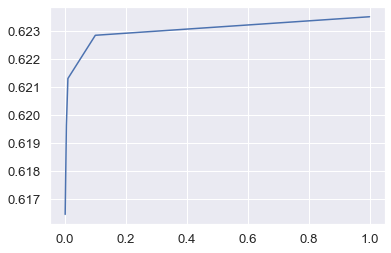

In [123]:
# Save cv results as a DataFrame
gcv_result = pd.DataFrame(gcv.cv_results_)

# Visualize how different values of C affect accuracy
plt.plot("param_C", "mean_test_score", data = gcv_result)

In [124]:
print(gcv.score(X_train_sc, y_train))
print(gcv.score(X_test_sc, y_test))

0.6272827769179748
0.6199319096255029


In [125]:
predictions_gcv = gcv.predict(X_test_sc)
print(predictions_gcv)

[3 5 5 ... 2 3 5]


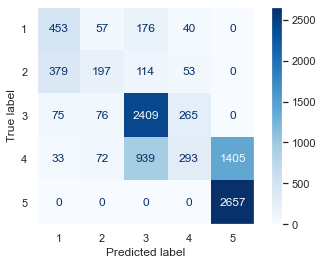

In [158]:
plot_confusion_matrix(gcv, X_test_sc, y_test, cmap = 'Blues')
plt.grid(None);

In [127]:
print(f'F1 Score:', f1_score(y_test, predictions_gcv, average = 'weighted').round(3))
print(f'Accuracy Score:', accuracy_score(y_test, predictions_gcv).round(3))
print(f'Precision Score:', precision_score(y_test, predictions_gcv, average = 'weighted').round(3))
print(f'Recall Score:', recall_score(y_test, predictions_gcv, average = 'weighted').round(3))

F1 Score: 0.55
Accuracy Score: 0.62
Precision Score: 0.573
Recall Score: 0.62


### Decision Tree Classifier

In [128]:
from sklearn.tree import DecisionTreeClassifier
dtree_model = DecisionTreeClassifier(class_weight = 'balanced', random_state = 42)#.fit(X_train_sc, y_train)
#dtree_predictions = dtree_model.predict(X_test_sc)

In [129]:
dtree_params = {
    'max_depth': [8, 9, 10, 11, 12],
    'min_samples_split': [3, 4, 5, 6, 7],
    'min_samples_leaf' : [3, 4, 5, 6, 7],
}
gs_dtree = GridSearchCV(dtree_model, param_grid = dtree_params, cv = 10, n_jobs = -1)
gs_dtree.fit(X_train_sc, y_train)
print(gs_dtree.best_score_)
gs_dtree.best_params_

0.7450802267018772


{'max_depth': 9, 'min_samples_leaf': 5, 'min_samples_split': 3}

In [130]:
print(gs_dtree.score(X_train_sc, y_train))
print(gs_dtree.score(X_test_sc, y_test))

0.7722308202520451
0.7384710615908388


In [131]:
predictions_gs_dtree = gs_dtree.predict(X_test_sc)
print(predictions_gs_dtree)

[4 5 5 ... 4 4 5]


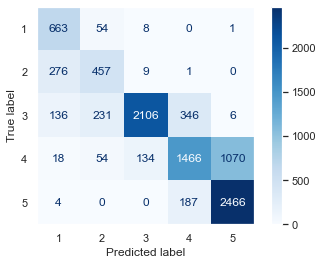

In [157]:
plot_confusion_matrix(gs_dtree, X_test_sc, y_test, cmap = 'Blues')
plt.grid(None);

In [133]:
print(f'F1 Score:', f1_score(y_test, predictions_gs_dtree, average = 'weighted').round(3))
print(f'Accuracy Score:', accuracy_score(y_test, predictions_gs_dtree).round(3))
print(f'Precision Score:', precision_score(y_test, predictions_gs_dtree, average = 'weighted').round(3))
print(f'Recall Score:', recall_score(y_test, predictions_gs_dtree, average = 'weighted').round(3))

F1 Score: 0.735
Accuracy Score: 0.738
Precision Score: 0.759
Recall Score: 0.738


### Gradient Boosting

In [135]:
from sklearn.ensemble import GradientBoostingClassifier

In [136]:
gbc = GradientBoostingClassifier(learning_rate = 0.01, random_state = 42, verbose = 2)

In [137]:
gbc_params = {
    'n_estimators': [150, 200, 250, 300],
    'max_features' : [2, 3, 4, 5],
    'max_depth': [2, 3, 4, 5]
}
gs_gbc = GridSearchCV(gbc, param_grid = gbc_params, cv = 5, n_jobs = -1)
gs_gbc.fit(X_train_sc, y_train)
print(gs_gbc.best_score_)
gs_gbc.best_params_

      Iter       Train Loss   Remaining Time 
         1           1.4552           33.88s
         2           1.4437           35.50s
         3           1.4348           39.30s
         4           1.4268           41.93s
         5           1.4153           41.04s
         6           1.4057           48.89s
         7           1.3984           50.69s
         8           1.3898           49.49s
         9           1.3804           48.50s
        10           1.3729           47.45s
        11           1.3645           46.93s
        12           1.3540           46.05s
        13           1.3457           45.57s
        14           1.3382           44.62s
        15           1.3296           44.12s
        16           1.3220           43.53s
        17           1.3153           42.88s
        18           1.3090           42.26s
        19           1.3023           41.72s
        20           1.2924           41.39s
        21           1.2850           41.04s
        2

       183           0.7160           15.62s
       184           0.7144           15.48s
       185           0.7126           15.36s
       186           0.7114           15.22s
       187           0.7095           15.09s
       188           0.7084           14.95s
       189           0.7067           14.81s
       190           0.7050           14.68s
       191           0.7036           14.54s
       192           0.7023           14.40s
       193           0.7005           14.27s
       194           0.6995           14.12s
       195           0.6980           13.99s
       196           0.6967           13.85s
       197           0.6957           13.71s
       198           0.6940           13.57s
       199           0.6925           13.44s
       200           0.6913           13.32s
       201           0.6899           13.18s
       202           0.6886           13.05s
       203           0.6872           12.91s
       204           0.6858           12.78s
       205

{'max_depth': 5, 'max_features': 4, 'n_estimators': 300}

In [138]:
print(gs_gbc.score(X_train_sc, y_train))
print(gs_gbc.score(X_test_sc, y_test))

0.767808976343135
0.7409470752089137


In [139]:
predictions_gs_gbc = gs_gbc.predict(X_test_sc)
print(predictions_gs_gbc)

[4 5 5 ... 4 4 5]


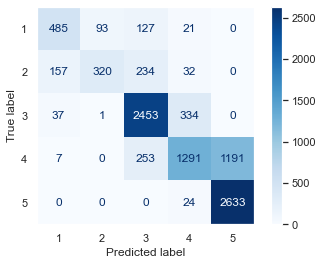

In [156]:
plot_confusion_matrix(gs_gbc, X_test_sc, y_test, cmap = 'Blues')
plt.grid(None);

In [141]:
print(f'F1 Score:', f1_score(y_test, predictions_gs_gbc, average = 'weighted').round(3))
print(f'Accuracy Score:', accuracy_score(y_test, predictions_gs_gbc).round(3))
print(f'Precision Score:', precision_score(y_test, predictions_gs_gbc, average = 'weighted').round(3))
print(f'Recall Score:', recall_score(y_test, predictions_gs_gbc, average = 'weighted').round(3))

F1 Score: 0.724
Accuracy Score: 0.741
Precision Score: 0.749
Recall Score: 0.741


### Feature Importance

In [142]:
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(train_dummies.columns, gs_dtree.best_estimator_.feature_importances_):
    feats[feature] = importance #add the name/value pair 

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})

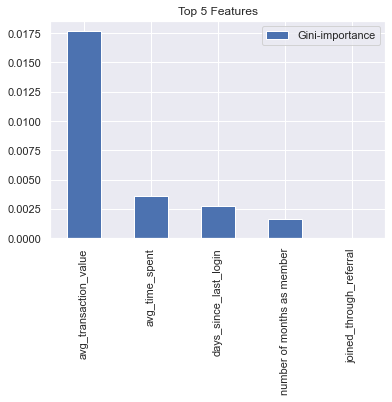

In [163]:
importances.head(5).sort_values(by = 'Gini-importance', ascending = False).plot(kind='bar').set_title('Top 5 Features');

## 7. Conclusion and recommendations

Decision Tree Classifier and MixMaxScaler with cross validation the best model model for this multiclass classification. For a better modeling score, future works includes, using other classification algorithms like XGBoost or even neutrel network, etc to test if whether other models are better. More datas will be require for better prediction and more feature engineering will be done to improve the score.

In conclusion, models are not overfitted and the imbalance dataset are timely dealt with, by using parameters in the models such as 'One Vs Rest (ovr)' and 'balanced class weights'. A deeper exploration will also be done to have a deeper understanding on customer behaviors and to further on to Customer Lifetime value prediction.